In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
import math
import seaborn as sns

from sklearn import linear_model
import sklearn


In [81]:
print(dir(sklearn))
print ('\n\n')
print (dir(sklearn.linear_model))

['_ASSUME_FINITE', '__SKLEARN_SETUP__', '__all__', '__builtins__', '__cached__', '__check_build', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_contextmanager', 'base', 'clone', 'config_context', 'exceptions', 'externals', 'feature_selection', 'get_config', 'linear_model', 'logger', 'logging', 'metrics', 'model_selection', 'neighbors', 'os', 'preprocessing', 'random_projection', 're', 'set_config', 'setup_module', 'svm', 'sys', 'utils', 'warnings']



['ARDRegression', 'BayesianRidge', 'ElasticNet', 'ElasticNetCV', 'Hinge', 'Huber', 'HuberRegressor', 'Lars', 'LarsCV', 'Lasso', 'LassoCV', 'LassoLars', 'LassoLarsCV', 'LassoLarsIC', 'LinearRegression', 'Log', 'LogisticRegression', 'LogisticRegressionCV', 'ModifiedHuber', 'MultiTaskElasticNet', 'MultiTaskElasticNetCV', 'MultiTaskLasso', 'MultiTaskLassoCV', 'OrthogonalMatchingPursuit', 'OrthogonalMatchingPursuitCV', 'PassiveAggressiveClassifier', 'PassiveAggressiveRegressor', 'Perce

In [82]:
sklearn.linear_model.LinearRegression()

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
datatrain=pd.read_csv('train.csv')
datatrain.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [84]:
datatest=pd.read_csv('test.csv')
datatest.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [85]:
datatrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
x    700 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 11.0 KB


In [86]:
datatest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
x    300 non-null int64
y    300 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [87]:
print (datatrain.isnull().sum())
print ('\n\n')
print (datatest.isnull().sum())

x    0
y    1
dtype: int64



x    0
y    0
dtype: int64


In [88]:
newtrain= datatrain.dropna(axis=0, how='any') # droping nan values,  
newtest=datatest.dropna(axis=0, how ='any') #any means if any coloum or row have nan then it drops that row or coloumn
print (newtrain.info())
print (newtest.info())
print ('len of original train data', len(datatrain))
print ('len of cleaned train data', len(newtrain))
print ('len of orginal test data', len(datatest))
print ('len of cleaned test data', len (newtest))
print ('dropped train', len(datatrain)-len(newtrain))
print ('dropped test', len(datatest)-len(newtest))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 699
Data columns (total 2 columns):
x    699 non-null float64
y    699 non-null float64
dtypes: float64(2)
memory usage: 16.4 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 2 columns):
x    300 non-null int64
y    300 non-null float64
dtypes: float64(1), int64(1)
memory usage: 7.0 KB
None
len of original train data 700
len of cleaned train data 699
len of orginal test data 300
len of cleaned test data 300
dropped train 1
dropped test 0


In [103]:
print ('train data', datatrain.describe())
print ('\n\n')
print ('test data',datatest.describe())

train data                  x           y
count   700.000000  699.000000
mean     54.985939   49.939869
std     134.681703   29.109217
min       0.000000   -3.839981
25%      25.000000   24.929968
50%      49.000000   48.973020
75%      75.000000   74.929911
max    3530.157369  108.871618



test data                 x           y
count  300.000000  300.000000
mean    50.936667   51.205051
std     28.504286   29.071481
min      0.000000   -3.467884
25%     27.000000   25.676502
50%     53.000000   52.170557
75%     73.000000   74.303007
max    100.000000  105.591837


C:\Users\sd\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\sd\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


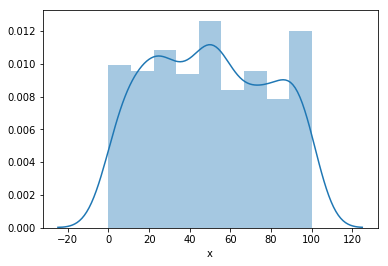

In [112]:
sns.distplot(newtrain['x'])

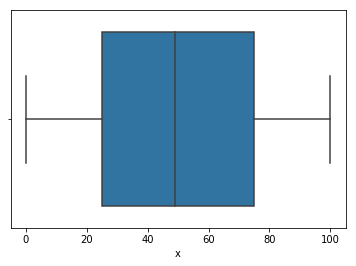

In [125]:
sns.boxplot(newtrain['x'])

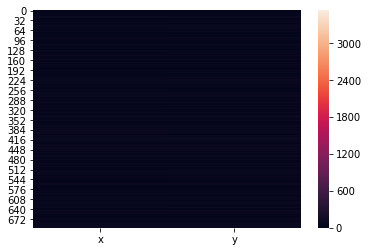

In [126]:
sns.heatmap(datatrain)

* Splitting the data into training and test data
* x_train,x_test, y_train, y_test= train_test_split(x,y,test_size=0.2, random_state=14)
* but at present work data has been splitted 

In [124]:
x_train = newtrain.as_matrix(['x'])
y_train =newtrain.as_matrix(['y'])
x_test= newtest.as_matrix(['x'])
y_test = newtest.as_matrix(['y'])
print ((x_train))

[[ 24.]
 [ 50.]
 [ 15.]
 [ 38.]
 [ 87.]
 [ 36.]
 [ 12.]
 [ 81.]
 [ 25.]
 [  5.]
 [ 16.]
 [ 16.]
 [ 24.]
 [ 39.]
 [ 54.]
 [ 60.]
 [ 26.]
 [ 73.]
 [ 29.]
 [ 31.]
 [ 68.]
 [ 87.]
 [ 58.]
 [ 54.]
 [ 84.]
 [ 58.]
 [ 49.]
 [ 20.]
 [ 90.]
 [ 48.]
 [  4.]
 [ 25.]
 [ 42.]
 [  0.]
 [ 60.]
 [ 93.]
 [ 39.]
 [  7.]
 [ 21.]
 [ 68.]
 [ 84.]
 [  0.]
 [ 58.]
 [ 19.]
 [ 36.]
 [ 19.]
 [ 59.]
 [ 51.]
 [ 19.]
 [ 33.]
 [ 85.]
 [ 44.]
 [  5.]
 [ 59.]
 [ 14.]
 [  9.]
 [ 75.]
 [ 69.]
 [ 10.]
 [ 17.]
 [ 58.]
 [ 74.]
 [ 21.]
 [ 51.]
 [ 19.]
 [ 50.]
 [ 24.]
 [  0.]
 [ 12.]
 [ 75.]
 [ 21.]
 [ 64.]
 [  5.]
 [ 58.]
 [ 32.]
 [ 41.]
 [  7.]
 [  4.]
 [  5.]
 [ 49.]
 [ 90.]
 [  3.]
 [ 11.]
 [ 32.]
 [ 83.]
 [ 25.]
 [ 83.]
 [ 26.]
 [ 76.]
 [ 95.]
 [ 53.]
 [ 77.]
 [ 42.]
 [ 25.]
 [ 54.]
 [ 55.]
 [  0.]
 [ 73.]
 [ 35.]
 [ 86.]
 [ 90.]
 [ 13.]
 [ 46.]
 [ 46.]
 [ 32.]
 [  8.]
 [ 71.]
 [ 28.]
 [ 24.]
 [ 56.]
 [ 49.]
 [ 79.]
 [ 90.]
 [ 89.]
 [ 41.]
 [ 27.]
 [ 58.]
 [ 26.]
 [ 31.]
 [ 70.]
 [ 71.]
 [ 39.]
 [  7.]
 [ 48.]
 [ 56.]


C:\Users\sd\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\sd\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\Users\sd\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\sd\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [91]:
x_train.mean()

50.01430615164521

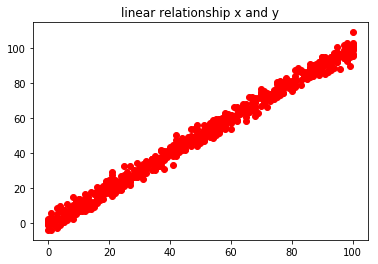

In [92]:
plt.title('linear relationship x and y')
plt.scatter(x_train, y_train,color='red')
plt.show()

Regression model

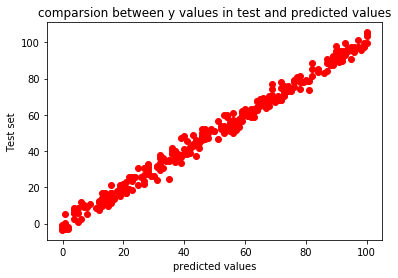

In [93]:
y_predict = lm.predict(x_test)
plt.title('comparsion between y values in test and predicted values')
plt.ylabel('Test set')
plt.xlabel('predicted values')
plt.scatter(y_predict, y_test, color= 'red')
plt.show()


In [94]:
err=((y_predict)-(y_test))**2
print (err)
err.mean()

[[8.01952208e+00]
 [5.15635241e+00]
 [1.37054454e+01]
 [4.19624590e+00]
 [3.52064235e+01]
 [2.59829300e+01]
 [9.35607930e+00]
 [7.09074987e+00]
 [2.28231934e+00]
 [1.48281308e+01]
 [1.17493511e+00]
 [3.27549687e+00]
 [6.50725256e-01]
 [2.97486882e-01]
 [1.87545543e+01]
 [6.41510867e-03]
 [4.09119123e+00]
 [7.47014149e+00]
 [1.37292303e+01]
 [6.87539717e+01]
 [1.00356554e+01]
 [1.60988155e+01]
 [7.65960860e-01]
 [2.70052063e+01]
 [2.07631717e-01]
 [8.36293887e-01]
 [4.01985523e-01]
 [3.15065643e+00]
 [6.57004785e-03]
 [1.01973492e-01]
 [1.97729410e+00]
 [2.72657172e-01]
 [4.89671678e+00]
 [1.78174647e+00]
 [2.66257550e+01]
 [2.28110093e+01]
 [4.82788001e-01]
 [2.75662629e-01]
 [2.36332934e-01]
 [1.17789449e+01]
 [1.68834150e+01]
 [7.68448340e+00]
 [1.07329950e+00]
 [4.40897099e+00]
 [2.93198773e+00]
 [6.45890089e-01]
 [7.30872715e+00]
 [8.55052545e+00]
 [3.13803900e+00]
 [3.65170562e-01]
 [1.77050951e+00]
 [1.06083859e-02]
 [4.64333524e+00]
 [1.03541365e+00]
 [4.63774327e-01]
 [8.702067

9.43292219203931

In [95]:
print ('R squre',lm.score(y_test, y_predict))
print ('R squre',lm.score(y_train, y_train))

R squre 0.9883886222259362
R squre 0.9999930121181387


In [102]:
a=(lm.score(y_test, y_predict))-(lm.score(y_train, y_train))
(a*100)**2
math.sqrt((a*100)**2)


1.1604389892202582

Conclusions: The figure showing the comparsion of y-test data and Y precicted values have best fit in the model and R-square value is 0.988. I.e. the model is good since the variable have strong linear relationship. 